### Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data from admissions.csv 

In [2]:
!!cd

['E:\\classroom\\ds\\aug16\\admission']

In [3]:
df = pd.read_csv("admission.csv")

#### Understand data 

In [4]:
df.head()

,Sno,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
df.columns

Index(['Sno', 'Gre', 'Toefl', 'Rating', 'Sop', 'Lor', 'Cgpa', 'Research',
       'Chance'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Sno         500 non-null int64
Gre         500 non-null int64
Toefl       500 non-null int64
Rating      500 non-null int64
Sop         500 non-null float64
Lor         500 non-null float64
Cgpa        500 non-null float64
Research    500 non-null int64
Chance      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [8]:
df.describe()

,Sno,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Data Visualization 

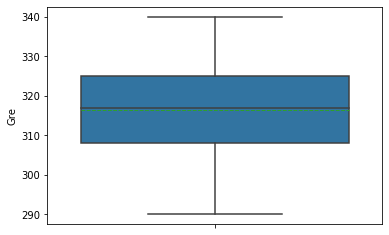

In [28]:
sns.boxplot(y="Gre",orient="v", data=df, showmeans=True, meanline=True)

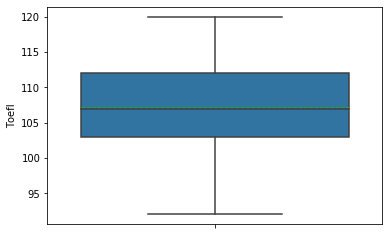

In [29]:
sns.boxplot(y="Toefl",orient="v", data=df, showmeans=True, meanline=True)

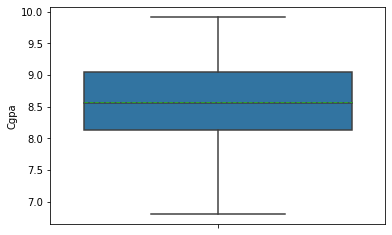

In [30]:
sns.boxplot(y="Cgpa",orient="v", data=df, showmeans=True, meanline=True)

#### Bi-variate Ananlysis

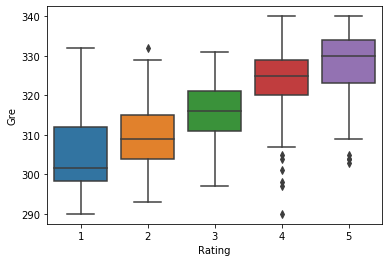

In [14]:
sns.boxplot(y="Gre", x ="Rating", data=df)

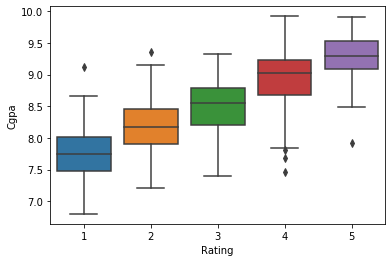

In [31]:
sns.boxplot(y="Cgpa", x ="Rating", data=df)

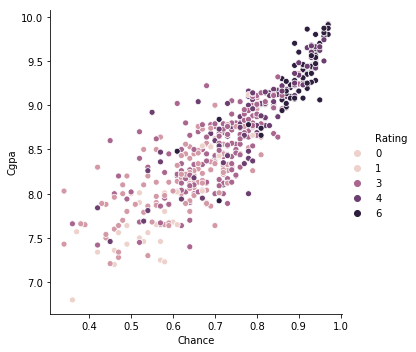

In [8]:
sns.relplot(data=df, x='Chance',y='Cgpa',hue='Rating') 

In [9]:
df.drop(columns=['Sno'], inplace=True)

In [10]:
corrmat = df.corr()

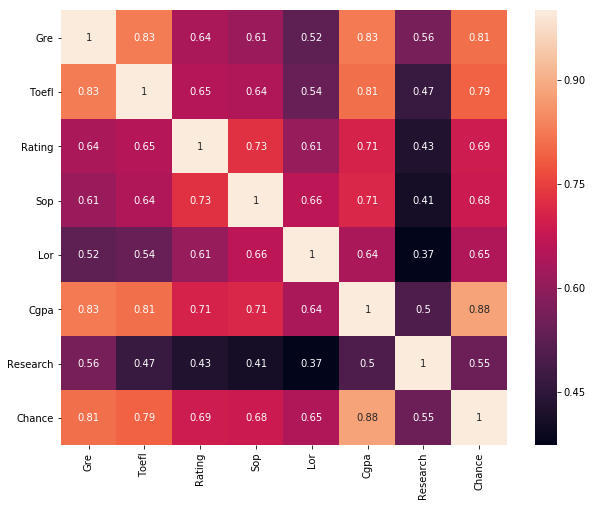

In [11]:
sns.heatmap(corrmat, annot=True)
plt.gcf().set_size_inches(10,8)

In [12]:
df.corr()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
Gre,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
Toefl,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
Sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
Lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
Cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [13]:
df.corr()['Chance'].sort_values(ascending=False)

Chance      1.000000
Cgpa        0.882413
Gre         0.810351
Toefl       0.792228
Rating      0.690132
Sop         0.684137
Lor         0.645365
Research    0.545871
Name: Chance, dtype: float64

## Build Machine Learning Model 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X = df[['Gre','Toefl','Rating','Sop','Lor','Cgpa','Research']]
y = df['Chance']

In [16]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [17]:
## Fit model or Training Model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
## Evaluate Model using test data 
y_pred = model.predict(X_test)

## Evaluate Model 

In [19]:
## get MSE, R2 and MAE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

Mean Squared Error : 0.00
R2 Score: 0.77
Mean Absolute Error : 0.05


## Pickle model 

In [21]:
!!cd

['E:\\classroom\\ds\\mar21\\admission']

In [22]:
pd.to_pickle(model,'LR_model.pickle')

## Test Model on user input

In [23]:
# Unpickle model and use it for predicting probability 
model = pd.read_pickle('LR_model.pickle')

In [25]:
data = [[295,120,4,4.5,4.5,7,0],[325,120,3,4.7,4.3,9,1]]
result = model.predict(data)
for r in result:
    print(f"Probability of getting admission is : {r*100}% ")  

Probability of getting admission is : 54.175846320652795% 
Probability of getting admission is : 85.06969737573722% 


In [26]:
prompts = ['GRE','TOEFL','University Rating','SOP','LOR','CGPA','Research']
data = []
for p in prompts:
    data.append( input('Enter ' + p + ' : '))

# convert all values to float
for idx,value in enumerate (data):
    data[idx] = float(value)    

    
result = model.predict([data])
print(f"Probability of getting admission is : {result[0]*100}% ")

Enter GRE :  310
Enter TOEFL :  110
Enter University Rating :  2
Enter SOP :  4
Enter LOR :  4
Enter CGPA :  8
Enter Research :  0


Probability of getting admission is : 63.965408134031996% 


In [27]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [28]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)   # R Squared 

0.5806410054538429

In [29]:
X = df[['Gre','Toefl','Cgpa']]
y = df['Chance']

In [30]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [31]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [32]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)   # R Squared 

0.4727522581199274